# Concours "végétalisons la ville" de Paris

<br><br>
<div>
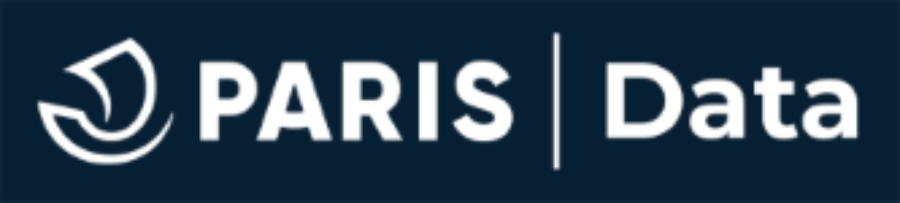
</div>
<br><br>

Dans ce challenge, nous allons réaliser une analyse exploratoire avec un jeu de données (source=<a href="https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets">opendata.paris.fr</a> ) portant sur les arbres de la ville de Paris.<br>
L'analyse exploratoire permettra par la suite de contribuer à une optimisation des tournées pour l'entretien des arbres de la ville.<br>
<br>
<br>
> "Eh oui, moins de tournées égale moins de trajets, et plus d’arbres entretenus".

<br>
<br>


# Sommaire
<br>
<ol style="font-size:18px;">
    <li><a href="#Création-de-l'environement">Création de l'environement</a></li>
    <ol style="font-size:15px;">
        <li><a href="#Comment-l'utiliser">Comment l'utiliser</a></li>
        <li><a href="#Ajouter-l'environement-au-jupyter-notebook">Ajouter l'environement au jupyter notebook</a></li>
    </ol><br>
    <li><a href="#Présentation-général-du-jeu-de-données">Présentation général du jeu de données</a></li>
    <ol style="font-size:15px;">
        <li><a href="#Importation-des-librairie">Importation des librairie</a></li>
        <li><a href="#Importation-du-fichier">Importation du fichier</a></li>
        <li><a href="#Analyse-Contenu-du-fichier">Analyse Contenu du fichier</a></li>
        <li><a href="#Analyse-des-données-uniques">Analyse des données uniques</a></li>
        <li><a href="#Analyse-des-données-manquantes">Analyse des données manquantes</a></li>
        <li><a href="#Analyse-des-doublons">Analyse des doublons</a></li>
    </ol><br>
    <li><a href="#Analyse-des-données">Analyse des données</a></li>
    <ol style="font-size:15px;">
        <li><a href="#Analyse-statistique-univariée">Analyse statistique univariée</a></li>
        <li><a href="#Analyse-des-aberrations">Analyse des aberrations</a></li>
        <li><a href="#Analyse-des-données-(statistique-bivariée)">Analyse des données (statistique bivariée)</a></li>
    </ol><br>
    <li><a href="#Nettoyage-du-jeu-de-données">Nettoyage du jeu de données</a></li><br>
    <li><a href="#Synthèse-analyse-de-données">Synthèse analyse de données</a></li>
</ol><br><br>

# Création de l'environement 

Création de l'environement avec "Conda".

## Comment l'utiliser

Pour crée l'environement : <br>
`conda env create --file environment.yaml` <br>

Activer l'environement: <br>
`conda activate projet2`<br>

Sortir de l'environement : <br>
`conda deactivate projet2`

Supprimer l'environement : <br>
`conda env remove --name projet2` <br>

## Ajouter l'environement au jupyter notebook

`python -m ipykernel install --user --name=projet2`


# Présentation général du jeu de données

Dans cette section nous allons importez puis etudiez le contenue du fichier plat.<br>
<br>
Cette partie nous servira a mieux comprendre la structure du fichier et les données de celui-ci.<br>
Grâce à cette analyse rapide, nous pourons faire une analyse plus approfondie de sont contenue (analyse statistique, abérration, etc...)

## Importation des librairie

On importe toutes les librairies nécessaire a l'éxecution du code

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import branca
import folium
from folium.plugins import MarkerCluster

## Importation du fichier

On commence par récupèrer le fichier plat et on le stock dans une dataframe.

In [2]:
# importation du fichier plat vers un dataframe
data = pd.read_csv("./data/p2-arbres-fr.csv",encoding="utf-8",sep=";")
print("Dimensionnalité du DataFrame: ", data.shape)
# visualtion du dataframe (5 premières lignes)
data.head()


Dimensionnalité du DataFrame:  (200137, 18)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


On remarque que le fichier contient un total de **200137 lignes et 18 colonnes**.


## Analyse Contenu du fichier

Nous allons maintenant regardez le contenu du fichier dans ça globalité afin de mieux le comprendre (type de données, et compréhension général).

In [3]:
# information sur les données
print("Info global de notre data frame :\n")
data.info()

Info global de notre data frame :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-n

Cette remontée d'information nous permet de connaître le type des colonnes, le nombre de valeurs non vide(*Non-Null*) et le nom des colonnes.<br>
On remarque que la colonnes **numero** semble être **vide**.
<br><br>
Avant tout petit rappel sur les types :
<ul>
    <li>int64 = Nombres entiers </li>
    <li>float64 = Nombre à virgule floattante</li>
    <li>bool = Valeur binaire (0/1 OU Vrais/Faux)</li>
    <li>object = Text ou autre valeur mixte (texte + numériques)</li>
</ul>
<br>
Grâce au nom des colonnes et aux informations receuillis on peut en déduire le role de chacun et leurs types : 

<ul>
    <li>id = <b>identification de la ligne (int)</b></li>
    <li>type_emplacement = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>domanialite = <b>type de domaine, lieux (object)</b></li>
    <li>arrondissement =<b> arrondissement de Paris (object)</b></li>
    <li>complement_addresse = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>lieu = <b>adresse exact (object)</b></li>
    <li>id_emplacement = <b>identification de l'emplacement (object)</b> </li>
    <li>libelle_francais = <b>nom français de l'arbre (object)</b></li>
    <li>genre = <b>genre de l'arbre (object)</b></li>
    <li>espece = <b>espèce de l'arbre (object)</b></li>
    <li>variete = <b style="color: red">a définir</b><b> (object)</b></li>
    <li>circonference_cm = <b>circonférence de l'arbre (en cm) (int)</b></li>
    <li>hauteur_m = <b>hauteur de l'arbre (en m) (int)</b></li>
    <li>stade_developpement = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>remarquable = <b style="color: red">à définir</b><b> (float)</b></li>
    <li>geo_point_2d_a = <b>géolocation latitude (float)</b></li>
    <li>geo_point_2d_b = <b>géolocation longitude (float)</b></li>
</ul>


Comme nous connaissons le type des données on peut maintenant faire une analyse descriptive des données sur les valeurs numériques puis non numérique : 

<ul>
    <li>Pour les valeurs <b>numériques</b> :</li>
    <ul>
        <li>Nombre de valeur</li>
        <li>Moyenne</li>
        <li>Ecart-type</li>
        <li>Quartile</li>
        <li>Valeur min</li>
        <li>Valeur max</li>
    </ul>
    <li>Pour les valeurs <b>non numériques</b> : </li>    
    <ul>
        <li>Nombre de valeurs</li>
        <li>Nombre de valeurs unique</li>
        <li>Valeur la plus fréquente</li>
        <li>Fréquence de la valeur la plus fréquente</li>
    </ul>
</ul>


In [4]:
# Colonne définis comme numérique
columns_to_see=["id","circonference_cm","hauteur_m","remarquable","geo_point_2d_a","geo_point_2d_b"]
data[[col for col in columns_to_see]].describe(include='all').apply(lambda s: s.apply('{0:.5f}'.format))

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.00000,200137.00000,200137.00000,137039.00000,200137.00000,200137.00000
mean,387202.68231,83.38048,13.11051,0.00134,48.85449,2.34821
std,545603.24236,673.19021,1971.21739,0.03662,0.03023,0.05122
min,99874.00000,0.00000,0.00000,0.00000,48.74229,2.21024
25%,155927.00000,30.00000,5.00000,0.00000,48.83502,2.30753
50%,221078.00000,70.00000,8.00000,0.00000,48.85416,2.35110
75%,274102.00000,115.00000,12.00000,0.00000,48.87645,2.38684
max,2024745.00000,250255.00000,881818.00000,1.00000,48.91148,2.46976


Cette description nous indique plusieurs choses, on voir ici que **l'id commence a 99.874,0 et termine à 2.024.745,0 pour un total de 200.137,0 valeurs**.<br><br>
pour la circonférence et la hauteur on voir que les **valeur min sont 0 et les valeurs max sont très élevés**, cela ne semble pas être possibles, de même pour **l'écart-type (std)** qui indique un chiffre **bien suppérieur a la moyenne et au quartile 0,75** , **une analyse d'abérration** semble ici nécessaire.<br><br>
pour remarquable on peut penser ici que les valeur son autours de 0 et 1 et que plus de **75% des valeurs sont équals à 0**.<br><br>
pour les géoposition on voir des valeur pour "a" autour de 48 et "b" 2, comme nous somme sur un jeu de données des arbres de la ville de Paris on peut savoir que **"geo_point_2d_a" correspond à la longitude et "geo_point_2d_b" correspond à la latitude**.

In [5]:
# Colonne non définis comme numérique
columns_to_see=["type_emplacement","domanialite","arrondissement","complement_addresse","lieu","id_emplacement","libelle_francais","genre","espece","variete","stade_developpement"]
data[[col for col in columns_to_see]].describe(include='all')

,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,stade_developpement
count,200137,200136,200137,30902,200137,200137,198640,200121,198385,36777,132932
unique,1,9,25,3795,6921,69040,192,175,539,436,4
top,Arbre,Alignement,PARIS 15E ARRDT,SN°,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',A
freq,200137,104949,17151,557,2995,1324,42508,42591,36409,4538,64438


Cette description des valeurs non numériques nous donnes des information interresante, on peut tous de suite voir, par exemple, que le type d'emplacement ne contient que une valeur "Arbre" sur toutes les lignes.<br>
Pour les domanialite, on voir que **50% environ des valeur sont des "Alignement"**.<br> 
<br>
Grâce à ces tableaux nous avons un bonne aperçu du jeu de données global (valeurs numériques et non numériques).

## Analyse des données uniques

Nous avons identifiez la plupart des données, on vas faire un focus sur les valeurs qu'il nous reste à définir. pour sa on regarde les valeurs que prennent chaques données.<br>
On commence par identifier les colonnes qu'on ne comprend pas encore avant d'analyser les autres données.

In [6]:
# on cherche toutes les valeurs uniques pour savoir si cette colonnes comprend une autre valeur que "Arbre"
data.type_emplacement.unique()

array(['Arbre'], dtype=object)

Pour le type d'emplacement **toute les valeurs sont équals à "Arbre"**.<br>Cette valeur indique certainement l'entité/objet présent (ici forcèment un arbre).

In [7]:
# On regarde les valeur que prend complement adresse
data[data.complement_addresse.notna()].complement_addresse.unique()

array(['c 12', '12-36', '12-35', ..., 'au n.14', 'F2bis', '40face'],
      dtype=object)

Pour complement_addresse on retrouve des complements d'adresses, qui peuvent correspondre à **des emplacements, des numéros d'adresse complémentaire ou des indications**.

In [8]:
# On regarde les valeur que prend la colonne "variete" (10 première valeur) pour comprendre la données
data.variete.unique()[:10]

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'"],
      dtype=object)

Pour variete on retrouve les différentes variétés d'arbre, on remarque également que l'**apostrophe** est ajouté **à la fin** de chaque nom de variétés. <br>
On peut également voir une valeur qui indique **"n. sp."**, on peut en déduire le terme **"non spécifié"**.

In [9]:
# On recommence avec stade_developpement comme pour variete
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

Pour stade_developpemnet on retrouve 4 valeurs, **A, J, JA et M**.<br>
En regardant sur le site opendata.paris on comprend que :
<ul>
    <li>J  = Jeune (arbre)</li>
    <li>JA = Jeune (arbre) Adulte</li>
    <li>A  = Adulte</li>
    <li>M  = Mature</li>
</ul>

In [10]:
# on recherche les valeurs unique de la colonne remarquable
data.remarquable.unique()

array([ 0., nan,  1.])

Pour remarquable, on voir 2 valeurs possibles qui sont 0 ou 1 en float. On peut donc considérer que c'est une valeur **boolean**.<br>
Désigne donc les arbres avec des spécificités particulières.

In [11]:
# toujours pareil mais avec domanialite
data.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

On peut voir pour les domanialites que la syntaxe change entre **capitalize** et **uppper_case**

### Compréhension des données :
Pour résumer : 
<ul>
    <li>id = <b>identification de la ligne (int)</b></li>
    <li>type_emplacement = <b>désigne l'entité ici "Arbre"</b><b> (object)</b></li>
    <li>domanialite = <b>type de domaine, lieux</b><b> (object)</b></li>
    <li>arrondissement =<b>arrondissement de Paris</b><b> (object)</b></li>
    <li>complement_addresse = <b>complément d'adresse</b><b> (object)</b></li>
    <li>lieu = <b>adresse exact</b><b> (object)</b></li>
    <li>id_emplacement = <b>identification de l'emplacement</b><b> (object)</b> </li>
    <li>libelle_francais = <b>nom français de l'arbre</b><b> (object)</b></li>
    <li>genre = <b>genre de l'arbre</b><b> (object)</b></li>
    <li>espece = <b>espèce de l'arbre</b><b> (object)</b></li>
    <li>variete = <b>variété de l'arbre</b><b> (object)</b></li>
    <li>circonference_cm = <b>circonférence de l'arbre (en cm)(int)</b></li>
    <li>hauteur_m = <b>hauteur de l'arbre (en m) (int)</b></li>
    <li>stade_developpement = <b>maturité de l'arbre</b></li>
    <li>remarquable = <b>arbre remarquable (boolean)</b></li>
    <li>geo_point_2d_a = <b>géolocalisation latitude (float)</b></li>
    <li>geo_point_2d_b = <b>géolocalisation longitude (float)</b></li>
</ul>

Maintenant nous avons une meilleur compréhension et maitrisse des données.

In [12]:
# Toute les valeurs uniques
data_unique = pd.DataFrame(data.apply(lambda col : col.unique()),columns=["unique_value"])
# Le nombre de valeurs uniques
data_unique["unique_count"] = data.apply(lambda col : col.nunique())
# Le nombre de valeur non vide
data_unique["row_not_na"]=data.notna().astype(int).agg("sum")
# Le pourcentage de valeur unique
data_unique["unique_rate"]=((data_unique.unique_count / data_unique.row_not_na) * 100).round(4)

data_unique.sort_values(by='unique_rate',ascending=False)

,unique_value,unique_count,row_not_na,unique_rate
id,"[99874, 99875, 99876, 99877, 99878, 99879, 998...",200137,200137,100.0000
geo_point_2d_b,"[2.3209621099, 2.3210314229, 2.321060566, 2.32...",200114,200137,99.9885
geo_point_2d_a,"[48.8576199541, 48.8576560697, 48.8577050069, ...",200107,200137,99.9850
id_emplacement,"[19, 20, 21, 22, 000G0037, 000G0036, 000G0035,...",69040,200137,34.4964
complement_addresse,"[nan, c 12, 12-36, 12-35, face 64 Manin, 19-02...",3795,30902,12.2808
lieu,"[MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E, PA...",6921,200137,3.4581
variete,"[nan, Atropunicea', Euchlora', Schwedleri', Pi...",436,36777,1.1855
espece,"[hippocastanum, baccata, negundo, daniellii, x...",539,198385,0.2717
circonference_cm,"[20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...",531,200137,0.2653
libelle_francais,"[Marronnier, If, Erable, Arbre à miel, Platane...",192,198640,0.0967


### Analyse global des données unique


Ce tableau indique les valeur unique que prend chaque colonnes, ainsi que le nombre de valeur unique et le pourcentage sur le total de nombre de ligne non vide.<br>
La colonne **id** est **complète** et possèdent **que des valeurs uniques**. pour la **géoposition** on voir que **des valeurs sont doublés**. (sois même longitude ou même latitude)<br>
<br>
Nous avons déjà fait le détail de la plupart des valeur ci-dessus.<br>
On peut rappeler que la **domanialite** a des **syntaxes différentes**. on remarque également que l'**id d'emplacement** as des syntaxe différentes. **(ex : 000G0037 ou 19 )**

## Analyse des données manquantes

On vas maintenant passer à l'analyse des données manquantes, d'abord au global puis en détail.

In [13]:
# indication des valeurs manquantes
print("Pourcentage des valeurs manquante:")
(data.isna().mean() * 100).sort_values(ascending=True)

Pourcentage des valeurs manquante:


id                       0.000000
hauteur_m                0.000000
circonference_cm         0.000000
geo_point_2d_a           0.000000
id_emplacement           0.000000
lieu                     0.000000
geo_point_2d_b           0.000000
arrondissement           0.000000
type_emplacement         0.000000
domanialite              0.000500
genre                    0.007995
libelle_francais         0.747988
espece                   0.875400
remarquable             31.527404
stade_developpement     33.579498
variete                 81.624088
complement_addresse     84.559577
numero                 100.000000
dtype: float64

On peut voir ici que la colonne **numero** ne contient **aucune valeur**.<br>
Les colonnes complètes sont :
<ul>
    <li>id</li>
    <li>type_emplacement</li>
    <li>domanialite *(il manque une valeur)*</li>
    <li>arrondissement</li>
    <li>lieu</li>
    <li>id_emplacement</li>
    <li>circonference_cm</li>
    <li>hauteur_m</li>
    <li>geo_point_2d_a</li>
    <li>geo_point_2d_b</li>
</ul>

In [14]:
data[data.domanialite.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


Etant la seul données vide pour cette colonnes, et toutes les autres données semblent pertinante, on peut penser que cette valeur vide est tout simplement un **oublie/erreur**.<br>
Il peut donc être nécessaire de supprimer cette ligne si la domanialite est une variable importante de notre analyse.

In [15]:
columns_to_see = ["genre","domanialite","espece","variete","genre","espece","circonference_cm","hauteur_m","stade_developpement"]
# valeur des colonnes quand la colonne genre est vide.
data[data.genre.isna()][[col for col in columns_to_see]]

,genre,domanialite,espece,variete,genre,espece,circonference_cm,hauteur_m,stade_developpement
195404,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195409,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195410,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195475,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195476,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195487,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195496,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195497,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195499,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195502,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN


On voir qu'il y certainement une correlation quand la colonne **genre est vide** toutes les valeurs qui sont associés à une identification d'un arbre sont **NaN** ( **genre, espece, variete, espece, circonference_cm, hauteur_m et stade_developpement** ) et **domanialite** ça valeur prend **"Jardin"**.<br><br>
**On peut supposer que ce sont des arbres privées qui ne sont pas encore renseignés**.

>Attention cependant à ne pas faire la corrélation inverse, c'est à dire que si c'est un arbre privé ou que les donnée ne sont pas renseigner alors la colonne genre est forcement vide!

**Il est donc préférable de supprimer toutes ces lignes pour une future analyse.**

In [16]:
data[data.espece.isna()].head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1725,101858,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,D0030002,Pommier à fleurs,Malus,NaN,Aldenhamensis',40,4,NaN,NaN,48.880684,2.387536
2323,102582,Arbre,Jardin,PARIS 16E ARRDT,82 à 90,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,408032,Cornouiller,Cornus,NaN,Eddie's White Wonder',25,3,JA,0.0,48.872087,2.277040
2733,103215,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0167,Cerisier à fleurs,Prunus,NaN,Accolade',32,0,NaN,NaN,48.890072,2.316124
2742,103224,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0188,Cerisier à fleurs,Prunus,NaN,Accolade',60,0,NaN,NaN,48.890239,2.315838
3944,104827,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE RENE LE GALL,10255,Pommier à fleurs,Malus,NaN,Golden Hornet',40,4,NaN,NaN,48.832854,2.350704


Ici **aucune correlation** particulière pour la colonnes "espece" à vide.

 ## Analyse des doublons
 
 Dans cette partie nous allons analyser plus en détail chaque données pour identifier les doublons possible.

In [17]:
data_duplicate = pd.DataFrame(data.apply(lambda col : col.dropna().duplicated().agg("sum")),columns=["duplicate_value_count"])
# Le nombre de valeur non vide
data_duplicate["row_not_na"]=data.notna().astype(int).agg("sum")

data_duplicate["duplicate_rate"]=((data_duplicate.duplicate_value_count / data_duplicate.row_not_na) * 100).round(3)

data_duplicate["values_uniques"]=data.apply(lambda col : col.unique())

data_duplicate["unique_count"] = data.apply(lambda col : col.nunique())

data_duplicate.sort_values(by=["duplicate_rate",],ascending=False)

,duplicate_value_count,row_not_na,duplicate_rate,values_uniques,unique_count
type_emplacement,200136,200137,100.000,[Arbre],1
remarquable,137037,137039,99.999,"[0.0, nan, 1.0]",2
stade_developpement,132928,132932,99.997,"[nan, A, J, M, JA]",4
domanialite,200127,200136,99.996,"[Jardin, Alignement, DJS, DFPE, CIMETIERE, DAS...",9
arrondissement,200112,200137,99.988,"[PARIS 7E ARRDT, PARIS 17E ARRDT, PARIS 16E AR...",25
hauteur_m,199994,200137,99.929,"[5, 8, 10, 0, 17, 14, 3, 6, 4, 11, 7, 15, 9, 1...",143
genre,199946,200121,99.913,"[Aesculus, Taxus, Acer, Tetradium, Platanus, S...",175
libelle_francais,198448,198640,99.903,"[Marronnier, If, Erable, Arbre à miel, Platane...",192
circonference_cm,199606,200137,99.735,"[20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...",531
espece,197846,198385,99.728,"[hippocastanum, baccata, negundo, daniellii, x...",539


Ce tableau nous donne un première aperçu des valeurs dupliquées dans ce jeu de données.<br>
On peut s'interresser au valeur ayant peut de duplication comme la **géolocalisation** identique qui n'est pas possible, 
on peut ensuite voir si l'**id_emplacement** a des valeurs ressemblantes et identique (format de texte) pour des eventuelle **doublons sur des syntaxes différentes**.

Pour les doublons de la géolocalisation, on vas vérifier des géolocalisation précise identique, car il est possible d'avoir la même latitude mais pas la même longitude et donc un emplacement différent.<br>
Pour ça, on vas donc rechercher les **emplacements identiques en latitude et longitude**.

In [18]:
# duplicated geo _a ET _b
same_geo = data[data.duplicated(['geo_point_2d_a','geo_point_2d_b'],keep=False)]
# list colonnes à voir
columns_to_see = ["domanialite","id_emplacement","lieu","genre","variete","libelle_francais","geo_point_2d_a","geo_point_2d_b","stade_developpement"]
# reindexation pour une meilleur visibilité.
index = [i for i in range(1,len(same_geo)+1)]
same_geo.index=index
# affichage
same_geo.sort_values(by=["geo_point_2d_a","id"])[[col for col in columns_to_see]]

,domanialite,id_emplacement,lieu,genre,variete,libelle_francais,geo_point_2d_a,geo_point_2d_b,stade_developpement
9,Alignement,402029,ROUTE DAUPHINE,Tilia,NaN,Tilleul,48.829912,2.439665,NaN
10,Alignement,402030,ROUTE DAUPHINE,Tilia,NaN,Tilleul,48.829912,2.439665,NaN
16,Jardin,190042,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Populus,NaN,Peuplier,48.836416,2.446277,NaN
17,Jardin,190042,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Populus,Italica',Peuplier,48.836416,2.446277,A
13,Jardin,210034,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Fagus,Rotundifolia',Hêtre,48.836862,2.446518,JA
20,Jardin,210035,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Malus,NaN,Pommier à fleurs,48.836862,2.446518,NaN
1,Jardin,5,JARDIN PARTAGE BEL-AIR,Ailanthus,NaN,Ailante,48.838318,2.406610,NaN
2,Jardin,6,JARDIN PARTAGE BEL-AIR,Ailanthus,NaN,Ailante,48.838318,2.406610,NaN
15,Jardin,20069,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Cedrus,NaN,Cèdre,48.838539,2.439350,A
22,Jardin,20129,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Cedrus,NaN,Cèdre,48.838539,2.439350,NaN


Ce tableau nous donne plusieurs indications sur la duplication des géolocalisations, on remarque 4 symptomes :<br><br>

- Ligne 9 et 10 (index) par exemple, on remarque des **arbre simillaire** (libell, genre, variete) sur les **même géoposition mais a des id_emplacement qui se différencie souvent de 1**.<br><div style="color: #FB6F49;">On peut penser que ce sont des arbres identiques et très proche.</div>
<br><br>
- Ligne 16 et 17 (index) par exemple, on remarque **2 saisie identique avec juste une valeur qui diffère** (ici variete).<br><div style="color: #FB6F49;">On peut penser que c'est un oublie ou une mise à jours.</div>
<br><br>
- Ligne 12 et 19 (index) par exemple, on remarque **2 arbre différent à la même géolocalisation et le même id_emplacement**.<br><div style="color: #FB6F49;">On peut penser que c'est un nouvelle arbre qui a était planté (on peut sois prendre en compte le plus haut ID sois le stade developpement pour connaitre est le nouvelle arbre).</div>
<br><br>
- Ligne 5 et 8 (index) par exemple, on remarque **2 arbre identique** sur le type et la géolocalisation **mais a des id_emplacement et domanialite différent**.<br><div  style="color: #FB6F49;">On peut penser que c'est un changement de domanialite, on remarque une certaine corrélation entre la domanialite et le lieux (VOIE DF19 = VOIE DF/19) et en ne prennant que les derniers digit on remarque qu'il y a une corrélation : ...003 = 3, ..002 = 2.</div>

In [19]:
columns_to_see = ["domanialite","arrondissement","lieu","id_emplacement","libelle_francais","geo_point_2d_a","geo_point_2d_b"]
data[data.id_emplacement.duplicated(keep=False)].sort_values(by="id_emplacement")[[col for col in columns_to_see]].head(10)

,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,geo_point_2d_a,geo_point_2d_b
2268,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0001,Pin,48.833118,2.299095
8946,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0001,Fevier,48.889081,2.315414
9688,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000A0001,Hêtre,48.824114,2.338959
8947,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0002,Fevier,48.889140,2.315472
2269,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0002,Pin,48.833096,2.299237
2270,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0003,Charme-Houblon,48.833044,2.299204
8413,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000A0003,Hêtre,48.823903,2.339368
8948,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0003,Fevier,48.889201,2.315531
8949,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0004,Fevier,48.889261,2.315585
2271,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0004,Pin,48.833083,2.299095


On peut voir ici que l'id_emplacement n'est pas un id unique à chaque emplacement ou arbre. On retrouve le même id_emplacement dans différent arrondissement/lieux.<br><br>
La question qui peut maintenant se poser est comment les donner sont générés ?

Nous pouvons analyser la répartition des doublons, puis voir si il est judicieux et facile de convertir toutes les valeurs au format numériques.

In [20]:
count = data.id_emplacement.value_counts()
modalite = count.index
test = pd.DataFrame(modalite,columns=["id_emplacement"])
test["count"] = count.values
test["frequency"]=(test["count"] / len(data.id_emplacement.notna()))*100
test = test.sort_values(by="frequency",ascending=False)
print("Le nombre de categories est de {} valeurs pour un total de {} valeurs.".
      format(len(test),test["count"].sum()))
test.head(10)

Le nombre de categories est de 69040 valeurs pour un total de 200137 valeurs.


,id_emplacement,count,frequency
0,101001,1324,0.661547
1,101002,1241,0.620075
2,101003,1128,0.563614
3,202001,1032,0.515647
4,101004,1020,0.509651
5,202002,964,0.481670
6,101005,906,0.452690
7,202003,879,0.439199
8,101006,829,0.414216
9,202004,802,0.400726


On peut voir qu'il y a un **grand nombres de categories d'id_emplacement**, et les 10 valeurs les plus reccurentes sont des valeurs numériques.

In [21]:
count = data[data.id_emplacement.apply(lambda x : x.isdigit())==False].id_emplacement.value_counts()
modalite = count.index
notdigit = pd.DataFrame(modalite,columns=["id_emplacement"])
notdigit["count"] = count.values
notdigit["frequency"]=(notdigit["count"] / len(data.id_emplacement.notna()))*100
notdigit = notdigit.sort_values(by="frequency",ascending=False)
print("Le nombre de categories ne pouvant être transformée en valeur numérique est de {} valeurs pour un total de {} valeurs.".
      format(len(notdigit),notdigit["count"].sum()))
print("Le pourcentage de valeur non numérique est de {}% .".
      format( (( notdigit["count"].sum() / len(data.id_emplacement.notna()) )*100).round(3) ))
notdigit.head(10)

Le nombre de categories ne pouvant être transformée en valeur numérique est de 35441 valeurs pour un total de 40216 valeurs.
Le pourcentage de valeur non numérique est de 20.094% .


,id_emplacement,count,frequency
0,D00000010001,12,0.005996
2,D00000005001,12,0.005996
3,D00000013001,12,0.005996
1,D00000007001,12,0.005996
4,D00000004001,11,0.005496
5,D00000002001,11,0.005496
6,D00000003001,11,0.005496
7,D00000001002,10,0.004997
8,D00000012001,10,0.004997
9,A14000003001,10,0.004997


On voir ici que la moitier **des categorie de valeur** sont en partie **non numérique** mais que cela ne représente **que 20% du total des valeurs**.<br><br>
Il peut être interresant de se renseigner des indications des saisies d'id_emplacement pour comprendre le role des valeurs non numérique dans cette colonnes.<br>
A première vue cette colonne ne semble pas bloquante et peut être classifier comme **valeur qualitative nominal** pour identifier un arbre grâce à plusieurs autres facteurs (domanialite, lieu, arrondissement, géolocalisation).

 # Analyse des données
 
Pour ça nous allons proceder dans l'ordre :
<ul>
    <li>Analyse statistique univariée</li>
    <li>Analyse des abération</li>
    <li>Analyse statistique bivariée</li>
</ul>


## Analyse statistique univariée

On vas commencer par une analyse statistique de chaque colonnes interrésante.

Création du style des graphiques.

In [22]:
plt.style.use('seaborn-whitegrid')

SIZE_FONT = 15

plt.rc('font', size=SIZE_FONT) # taille de texte par défaut
plt.rc('axes', titlesize=SIZE_FONT) # taille des titres des axes
plt.rc('axes', labelsize=SIZE_FONT) # taille des labels des axes
plt.rc('xtick', labelsize=SIZE_FONT) # taille des ticks des ascisses
plt.rc('ytick', labelsize=SIZE_FONT) # taille des ticks des ordonnées
plt.rc('legend', fontsize=SIZE_FONT) # taille de la légende

dims_fig = (12,7)

### Valeur manquante
On peut commencer par analyser les données manquantes.

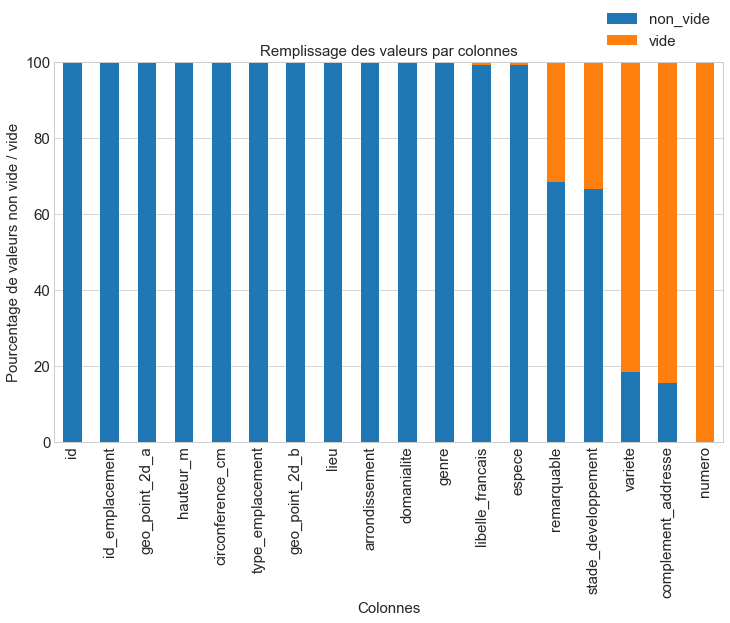

In [23]:
numberData = pd.DataFrame(data.apply(lambda col : ((col.notna().astype(int).sum()/ len(data))*100).round(3)),columns=["non_vide"])
numberData["vide"] = (data.isna().mean() * 100)
numberData = numberData.sort_values(by="non_vide",ascending=False)
numberData.plot.bar(figsize=dims_fig,stacked=True)


plt.title("Remplissage des valeurs par colonnes")
plt.ylabel("Pourcentage de valeurs non vide / vide")
plt.xlabel("Colonnes")

plt.legend(loc="lower right",bbox_to_anchor=(1, 1))

Comme décris dans la phase de présentation, certaine colonnes on beaucoup de valeur vide et la colonnes numéros ne contient aucune valeurs.

On peut également présenter les données vide par une heatmap qui nous indiquera la position des lignes vide.

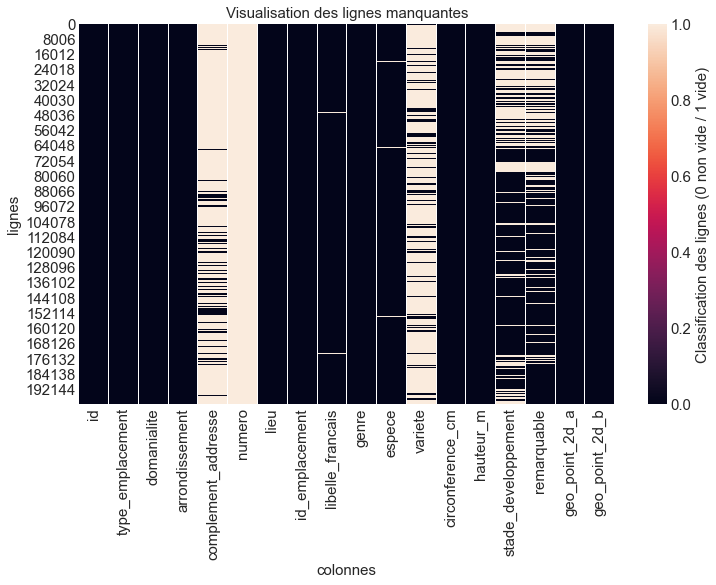

In [24]:
fig = plt.figure(figsize=dims_fig)
ax = sns.heatmap(data.isna())
ax.set_xlabel("colonnes")
ax.set_ylabel("lignes")
ax.set_title('Visualisation des lignes manquantes')
ax.collections[0].colorbar.set_label("Classification des lignes (0 non vide / 1 vide)")
plt.show()

La répartition des lignes manquantes n'indique pas de problème à première vue, mise à part la colonne numéro qui est completement vide.

### Arrondissement

Analysons la colonne arrondissement pour connaitre ça disribution statistique.

Les arrondissement sont répartie de la façon suivante :
PARIS 15E ARRDT      8.570
PARIS 13E ARRDT      8.350
PARIS 16E ARRDT      8.196
PARIS 20E ARRDT      7.665
PARIS 19E ARRDT      6.850
PARIS 12E ARRDT      6.296
SEINE-SAINT-DENIS    5.781
BOIS DE VINCENNES    5.751
PARIS 14E ARRDT      5.696
PARIS 17E ARRDT      5.377
PARIS 18E ARRDT      5.002
PARIS 7E ARRDT       4.306
VAL-DE-MARNE         3.787
PARIS 8E ARRDT       3.620
PARIS 11E ARRDT      2.827
HAUTS-DE-SEINE       2.647
BOIS DE BOULOGNE     1.988
PARIS 10E ARRDT      1.691
PARIS 4E ARRDT       1.369
PARIS 5E ARRDT       1.183
PARIS 6E ARRDT       0.881
PARIS 1ER ARRDT      0.706
PARIS 3E ARRDT       0.604
PARIS 9E ARRDT       0.583
PARIS 2E ARRDT       0.274
Name: arrondissement, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

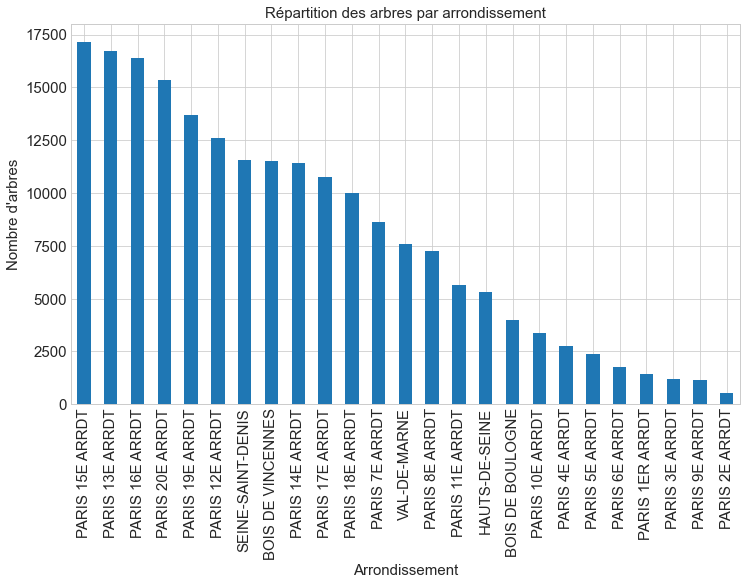

In [25]:
data.arrondissement.value_counts(normalize=False).plot.bar(figsize=dims_fig)
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des arbres par arrondissement")
print("Les arrondissement sont répartie de la façon suivante :\n{}".format((data.arrondissement.value_counts(normalize=True)*100).round(3)))
plt.show

On voir ici une plus forte densité dans certain arrondissement, et presque aucun arbre renseigner pour le 2e arrondissement.<br>
Les arbres ne sont pas réparties équitablement avec une plus forte densité dans certain arrondissement.

### Domanialite

Passons à la colonne Domanialite.

La domanialite est répartie de la façon suivante :
Alignement      52.439
Jardin          23.115
CIMETIERE       15.952
DASCO            3.209
PERIPHERIQUE     2.662
DJS              1.949
DFPE             0.662
DAC              0.010
DASES            0.002
Name: domanialite, dtype: float64


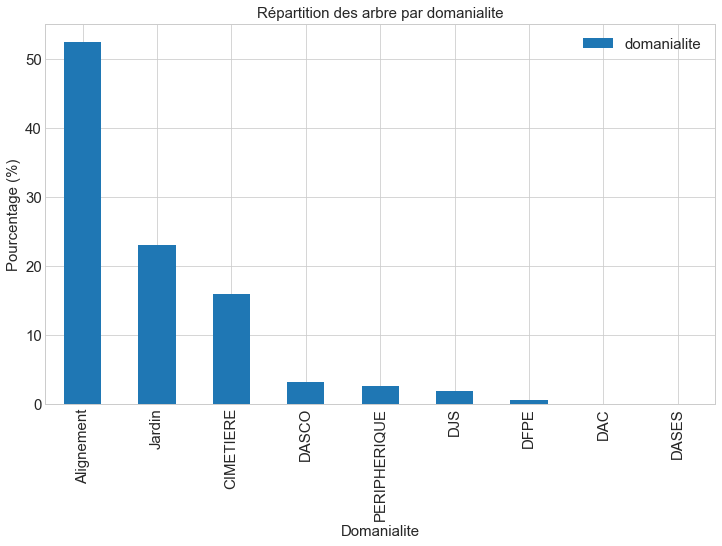

In [26]:
data_domanialite = pd.DataFrame( (data.domanialite.value_counts(normalize=True)*100).round(3) )
data_domanialite.plot.bar(figsize=dims_fig)
plt.xlabel("Domanialite")
plt.ylabel("Pourcentage (%)")
plt.title("Répartition des arbre par domanialite")

print("La domanialite est répartie de la façon suivante :\n{}".format((data.domanialite.value_counts(normalize=True)*100).round(3)))
plt.show()

Ici on remarque clairement que les 3 domanialite principaux sont **l'alignement avec 52%** des arbres puis les **jardin avec 23%** et enfin les **cimetières avec 16%** sois 91% des arbres sur ces 3 domanialites.

### Stade developpement

On vas maintenant analyser la répartition des stades de développements des arbres afin de connaitre l'état de maturité des arbres.

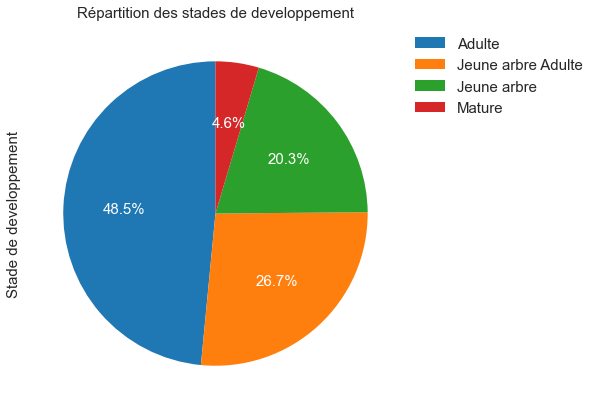

In [27]:
group_name=["Adulte","Jeune arbre Adulte", "Jeune arbre", "Mature"]
#colors = ['#784618', '#85582e', '#916b48', '#6b3705',]
data.stade_developpement.value_counts(normalize=True).plot.pie(figsize=dims_fig,
                                                               autopct='%1.1f%%',
                                                               startangle=90,
                                                               label="Stade de developpement",
                                                               #colors=colors,
                                                               textprops=dict(color="w"))

plt.title("Répartition des stades de developpement")
plt.legend(labels=group_name,bbox_to_anchor=(1.5, 1))

On voir que la répartition des arbres est environ de **50/50 entre les jeunes arbres (JA/J) et les arbres ancien(A/M)** et qu'il y a très peu d'arbre "Mature" et environ 20% de "Jeune arbre" fraichement planté.

### Arbre "Remarquable"

>Un arbre "Remarquable" est un arbre qui possède une forme particulière que l'on "remarque" par sa forme original, ces mensurations ou ça rareté etc.


In [28]:
data.remarquable.value_counts(normalize=False)

0.0    136855
1.0       184
Name: remarquable, dtype: int64

Ici on peux voir que la majorité des arbre ne sont pas "Remarquable", ce qui semble logique, on retrouve **seulement 184 arbre "Remarquable" sois 0.13% contre 136.855 arbre sois 99.87% des arbres** (*sur la totalité des ligne non vide pour cette colonne*).

### Hauteur & Circonférence

Pour ça on vas regarder par tranche, la première tranche sera les valeurs **possible**, puis les valeur **atypique** et enfin les valeurs **impossible**.

Pour les arbre on vas découper ces valeurs de 1 mètre à 20 qui sont les valeurs moyennes (à maturité) d'hauteur des arbres, ensuite de 25 à 116 ("Hypérion") qui est la taille de l'arbre le plus haut du monte, puis les valeurs supérieur a cet arbres.

hauteur_m
(1, 25]          159077
(25, 116]          1305
(116, 881818]        87
Name: hauteur_m, dtype: int64


Text(0, 0.5, "Nombre d'arbres")

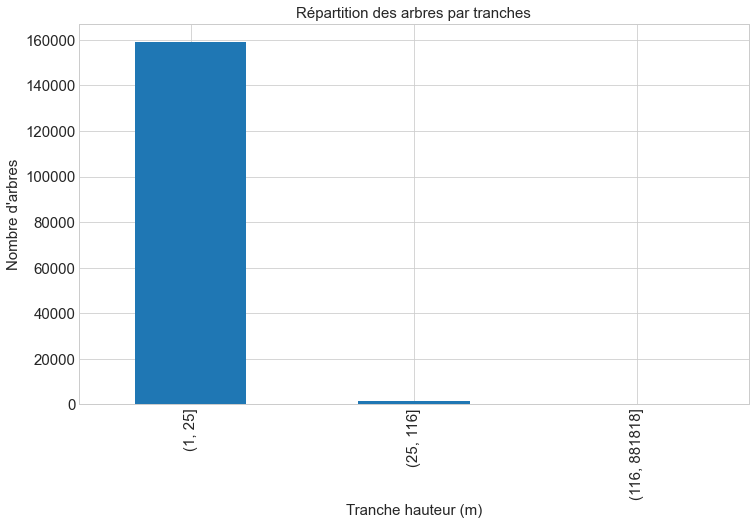

In [29]:
h_cut = pd.cut(data.hauteur_m,[1,25,116,data.hauteur_m.max()])
print(data.groupby(h_cut)["hauteur_m"].count())

data.groupby(h_cut)["hauteur_m"].count().plot.bar(figsize=dims_fig)

plt.title("Répartition des arbres par tranches")
plt.xlabel("Tranche hauteur (m)")
plt.ylabel("Nombre d'arbres")

On voir que la majorité des arbres sont bien dans des norme de mesure courante et que **1300 semblent atypique**.<br> On voir aussi que **87 valeur semblent impossible**.

Pour la circonférence nous allons donc prendre pour la **tranche possible** elle est comprise **entre 5 cm et 3 m** de circonférence, les **valeur atypique** seront comprise **entre 3m et 34 m** (circonférence du plus gros arbre du monde) et les valeurs abérrantes sont donc les valeurs supérieur à cela.

circonference_cm
(5, 300]          173246
(300, 3400]          904
(3400, 250255]        20
Name: circonference_cm, dtype: int64


Text(0, 0.5, "Nombre d'arbres")

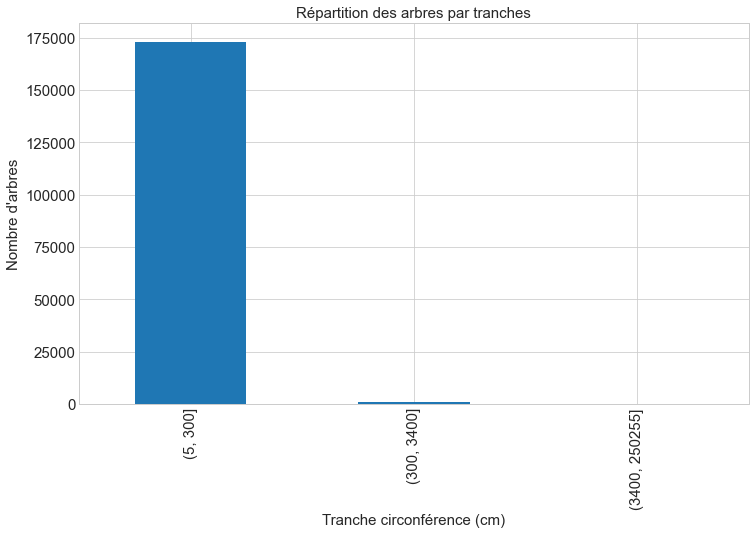

In [30]:
c_cut = pd.cut(data.circonference_cm,[5,300,3400,data.circonference_cm.max()])
print(data.groupby(c_cut)["circonference_cm"].count())

data.groupby(c_cut)["circonference_cm"].count().plot.bar(figsize=dims_fig)

plt.title("Répartition des arbres par tranches")
plt.xlabel("Tranche circonférence (cm)")
plt.ylabel("Nombre d'arbres")

On voir que la majorité des arbres sont bien dans des norme de mesure courante et que **904 semblent atypique**.<br> On voir aussi que **20 valeur semblent impossible**.

Il est encore possible d'analyser plus en profondeur les valeur atypiques, cette analyse nous donne juste une indication potentiel des valeurs aberrantes et atypiques.

## Analyse des aberrations

Reprennons pour ça le tableaux de description effectué au début.

In [31]:
# Description des données de circonférence hauteur et géolocalisation
def highlight_cell(val):
    color = 'red' if (val < 673 + 1 and val > 673 - 1) or (val < 1971 + 1 and val > 1971 -1) or (
        val < 250255 + 1 and val > 250255 - 1) or (val < 881818 + 1 and val > 881818 -1)else 'black'
    return 'color: %s' % color


descr = data[["circonference_cm","hauteur_m","geo_point_2d_a","geo_point_2d_b"]].describe()
descr = descr.style.applymap(highlight_cell)
descr

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,48.854491,2.348208
std,673.190213,1971.217387,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307530
50%,70.000000,8.000000,48.854162,2.351095
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


On remarque que **l'écart-type** de la **ciconference_cm et de la hauteur_m** est **très elevé** par rapport au valeurs moyennes et la moyenne des valeur des première 75%. <br>
On peut supposer qu'il y a des valeurs abérrantes pour ces 2 colonnes.<br>
Pour ce qui est de la géolocalisation des arbres les valeurs sembles cohérentes.

In [32]:
#pourcentage de valeur à 0
df_circon_hauteur = data[["circonference_cm","hauteur_m"]]
percentage0 = ((df_circon_hauteur[df_circon_hauteur==0].count() /
                df_circon_hauteur.notna().astype(int).agg("sum"))*100).round(3)

#Nombre de valeur 0 circonférence ET hauteur à 0
circonference_and_hauteur_0 = len(data.loc[(data["circonference_cm"]==0) & (data["hauteur_m"]==0)])
#Nombre de valeur 0 circonférence seulement
circonference_0 = len(data.loc[data["circonference_cm"]==0])
#Nombre de valeur 0 hauteur seulement
hauteur_0 = len(data.loc[data["hauteur_m"]==0])

# Affichage
print("""Pour la colonne \"circonference_cm\" il y a {} lignes etant à 0 et {} pour la colonne hauteur.
Il y a également {} ligne ou les 2 colonnes sont à 0.\n""".
      format(circonference_0,hauteur_0,circonference_and_hauteur_0))

print("Cela représente en pourcentage de lignes à 0: ")

percentage0

Pour la colonne "circonference_cm" il y a 25867 lignes etant à 0 et 39219 pour la colonne hauteur.
Il y a également 25501 ligne ou les 2 colonnes sont à 0.

Cela représente en pourcentage de lignes à 0: 


circonference_cm    12.925
hauteur_m           19.596
dtype: float64

In [33]:
Q1 = data[["circonference_cm","hauteur_m"]].quantile(0.25)
Q3 = data[["circonference_cm","hauteur_m"]].quantile(0.75)
EI = Q3 - Q1

outliers = ((data[["circonference_cm","hauteur_m"]] > (Q3 + 1.5 * EI)) |
                (data[["circonference_cm","hauteur_m"]] < (Q1 - 1.5 * EI)))
print("Les quartiles 1 on pour valeurs :\n{}\n\nLes quartiles 3 on pour valeurs :\n{}\n\nEt l\'écart interquartile est de :\n{}\n".
      format(Q1,Q3,EI))
print("On vérifie les outliers : \n",outliers)
print("On considère les outliers toutes les valeurs comprise entre : \n{} \nET \n{} ".format((Q3 + 1.5 * EI),(Q1 - 1.5 * EI)))

Les quartiles 1 on pour valeurs :
circonference_cm    30.0
hauteur_m            5.0
Name: 0.25, dtype: float64

Les quartiles 3 on pour valeurs :
circonference_cm    115.0
hauteur_m            12.0
Name: 0.75, dtype: float64

Et l'écart interquartile est de :
circonference_cm    85.0
hauteur_m            7.0
dtype: float64

On vérifie les outliers : 
         circonference_cm  hauteur_m
0                  False      False
1                  False      False
2                  False      False
3                  False      False
4                  False      False
...                  ...        ...
200132             False      False
200133             False      False
200134             False      False
200135             False      False
200136             False      False

[200137 rows x 2 columns]
On considère les outliers toutes les valeurs comprise entre : 
circonference_cm    242.5
hauteur_m            22.5
dtype: float64 
ET 
circonference_cm   -97.5
hauteur_m           -5.5
dt

Maintenant que nous avons récupérer **les outliers sur la base de multiple de quantile**, on peut comptabiliser et analyser les valeurs aberrantes.

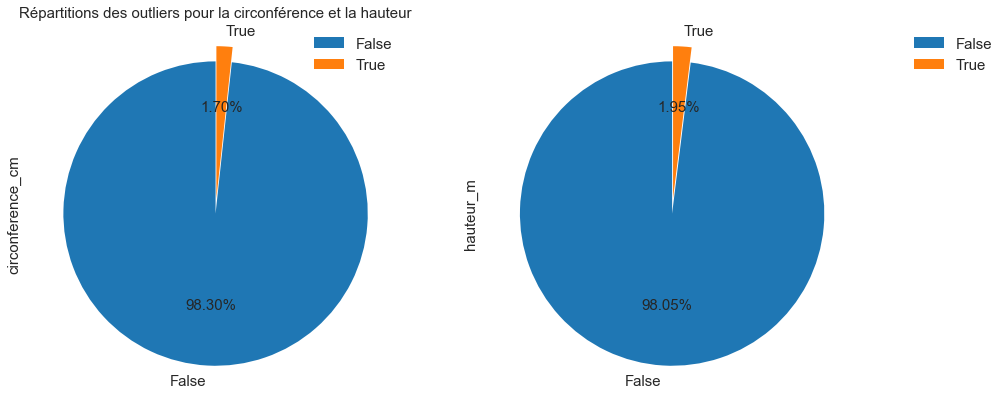

In [34]:
explode = (0,0.1)
fig = outliers.apply(lambda col : col.value_counts()).plot.pie(subplots=True,
                                                         figsize=(15,10),
                                                         autopct='%1.2f%%',
                                                         startangle=90,
                                                         explode=explode,
                                                         fontsize=15,
                                                         title=["Répartitions des outliers pour la circonférence et la hauteur",""])

plt.legend(bbox_to_anchor=(1.1, 1))

On voir ici que **1,7%** des valeur sont des outliers pour la circonférence et **1,95%** pour la hauteur.

On peut se demander maintenant comment sont répartie les abberrations et si ils sont atypique ou vraiment aberrante.<br>
Pour ça nous avons déjà réaliser une analyse sur des tranches dans l'étape d'analyse univariée qui nous a donnée une première indication.

Text(1.6, 180000, 'Aberration possible')

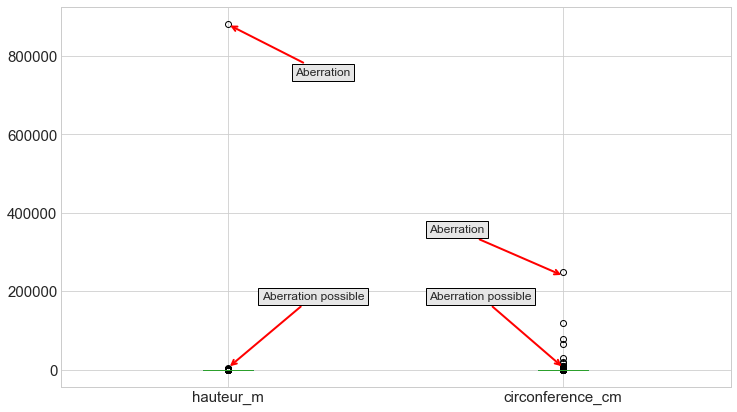

In [35]:
fig = data[["hauteur_m","circonference_cm"]].boxplot(figsize=dims_fig)

fig.annotate('Aberration',
            xy=(1,880000),
            xytext=(1.2,750000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )
fig.annotate('Aberration',
            xy=(2,240000),
            xytext=(1.6,350000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

fig.annotate('Aberration possible',
            xy=(1,6000),
            xytext=(1.1,180000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

fig.annotate('Aberration possible',
            xy=(2,6000),
            xytext=(1.6,180000),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

On remarque clairement des **valeurs aberrantes**, et d'autre valeurs plus proche mais des outliers tout de même.<br>
Faisons un **zoom** en oubliant les valeurs dont nous somme sur qu'elles sont aberrantes.<br><br>
On peut maintenant se demander si ces valeurs sont atypique ou vraiment aberrante.

[(-10.0, 500.0)]

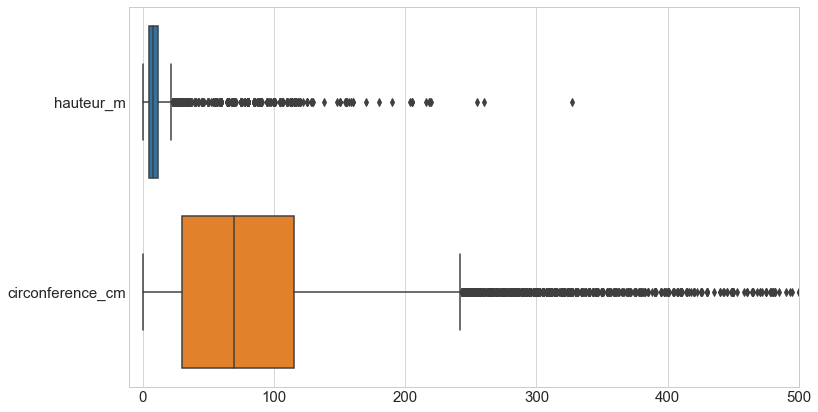

In [36]:
plt.figure(figsize=dims_fig)
ax= sns.boxplot(data=data[["hauteur_m","circonference_cm"]], orient="h")
ax.set(xlim=(-10,500))

#### Focus hauteur :

Text(50, -0.1, 'Aberration possible')

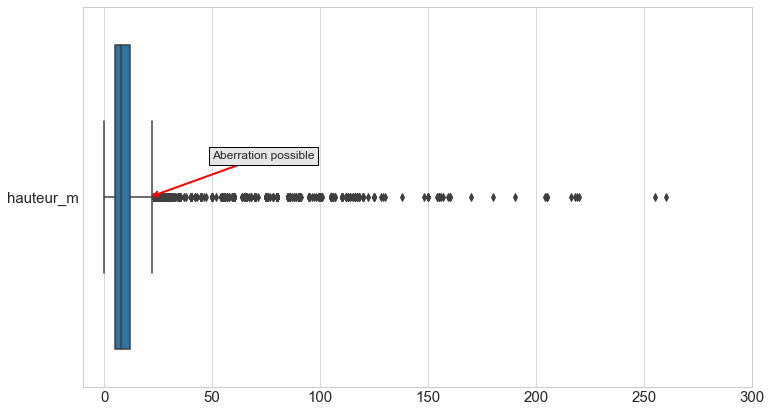

In [37]:
plt.figure(figsize=dims_fig)
ax= sns.boxplot(data=data[["hauteur_m"]], orient="h")
ax.set(xlim=(-10,300))
ax.annotate('Aberration possible',
            xy=(21,0),
            xytext=(50,-0.1),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

#### Focus circonférence :

Text(500, -0.1, 'Aberration possible')

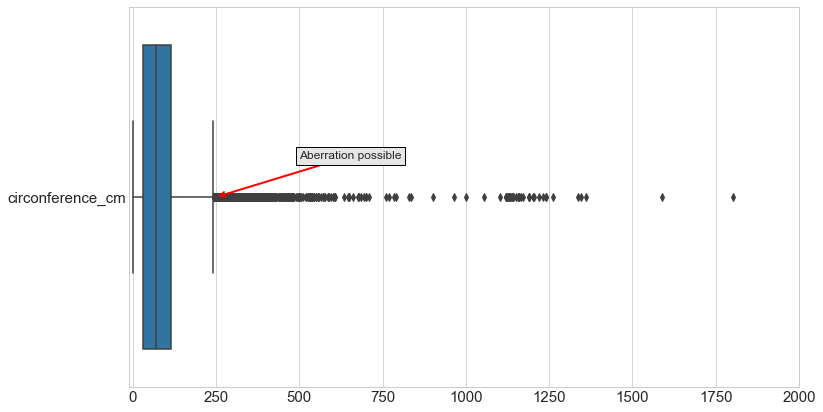

In [38]:
plt.figure(figsize=dims_fig)
ax= sns.boxplot(data=data[["circonference_cm"]], orient="h")
ax.set(xlim=(-10,2000))
ax.annotate('Aberration possible',
            xy=(250,0),
            xytext=(500,-0.1),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

Sur les valeurs de la **hauteur** on remarque que les outliers sont assez **regroupés jusqu'a environ 35m**, les valeur se disperse ensuite.<br>Pour la **circonférence** on voir que les outliers sont **regroupés jusqu'a environ 600cm**.<br>
<br>**Pour sa nous allons analyser la dispersion des valeurs plus en détail.**
<br><br> Il peut être intressant de vérifier au dessus des ces valeurs la cause de ces outliers.

### Analyse de la forme :
Ici on vas analyser l'asymétrie du jeu de données.

In [39]:
data[["circonference_cm", "hauteur_m"]].skew(axis=0, skipna = True)

circonference_cm    298.156614
hauteur_m           447.294132
dtype: float64

On voir ici que les deux valeurs indique **une distribution etalée à droite** .<br>Ce résultat est dus aux valeurs abérrantes que l'on trouve en **valeur max** par exmple : <br>
- circonférence : 250255 cm
- hauteur : 881818 m

Text(2000, 5e-05, 'Aberration possible')

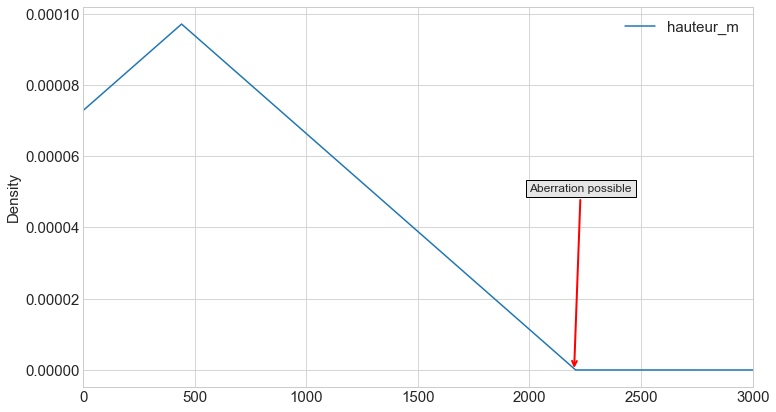

In [40]:
ax= data[["hauteur_m"]].plot(kind="density",figsize=dims_fig)
ax.set(xlim=(0,3000))

ax.annotate('Aberration possible',
            xy=(2200,0),
            xytext=(2000,0.00005),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

Text(600, 0.002, 'Aberration possible')

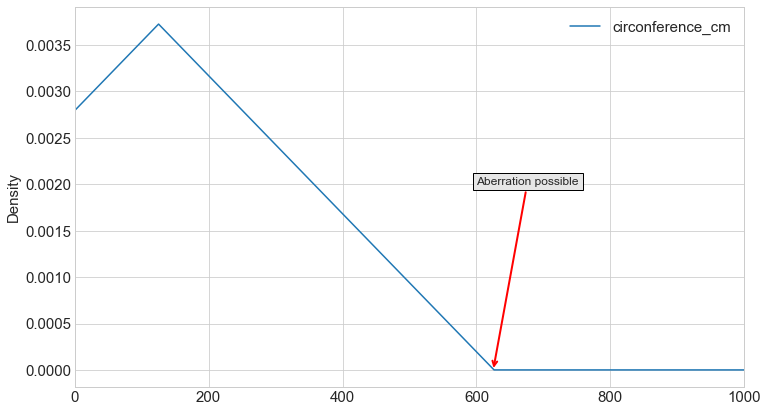

In [41]:
ax= data[["circonference_cm"]].plot(kind="density",figsize=dims_fig)
ax.set(xlim=(0,1000))
ax.annotate('Aberration possible',
            xy=(625,0),
            xytext=(600,0.0020),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9")
            )

On voir que la plupart de valeur se situe entre :
<ul>
    <li><b>0 et 2200 pour la hauteur</b></li>
    <li><b>0 et 625 pour la circonférence</b></li>
</ul>
<br>Ces valeurs semblent bien trop grande pour la hauteur mais plus réaliste pour la circonférence.

 ## Analyse des données (statistique bivariée)

L'analyse bivariée vas nous permettre de mieux analyser les valeur en mettant en corrélation les colonnes pour en faire ressortir des inforamtion intérresante. 

On peut commencer par mettre en corrélation les colonnes avec des variable quantitative.

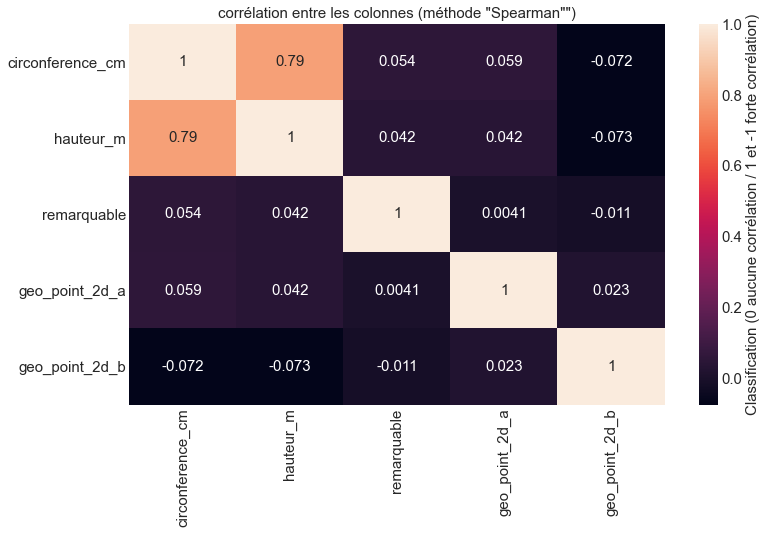

In [42]:
fig = plt.figure(figsize=dims_fig)
ax = sns.heatmap(data[["circonference_cm","hauteur_m","remarquable","geo_point_2d_a","geo_point_2d_b"]].
                 corr(method="spearman"),annot=True)
ax.set_title('corrélation entre les colonnes (méthode \"Spearman\"")')
ax.collections[0].colorbar.set_label("Classification (0 aucune corrélation / 1 et -1 forte corrélation)")
plt.show()
# https://fr.wikipedia.org/wiki/Corrélation_de_Spearman
# la corrélation spearman prend la relation monotone
# c'est à dire des variables qui ont tendance à se deplacer dans la même direction relative mais pas forcement a la même vitesse.
# Pearson = Linéaire / Spearman = monotone <=> linéaire 

On remarque ici que d'aprés la corrélation de Spearman, la colonne **circonférence et hauteur c'est très corréler**.

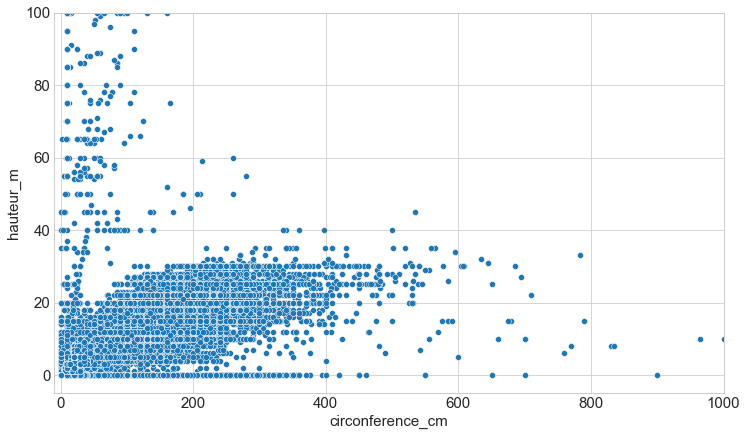

In [43]:
plt.figure(figsize=dims_fig)
ax = sns.scatterplot(data=data,x="circonference_cm",y="hauteur_m")
ax.set(xlim=(-10,1000))
ax.set(ylim=(-5,100))
plt.show()

On voir effectivement que les point se dirige globalement de façon identique presque de façon linéaire. <br>
On peut voir sur se graphique que des valeurs semblent défaillante, on peut voir des arbres très grand mais qui on pourtant une circonférence peut élever et inversement. 

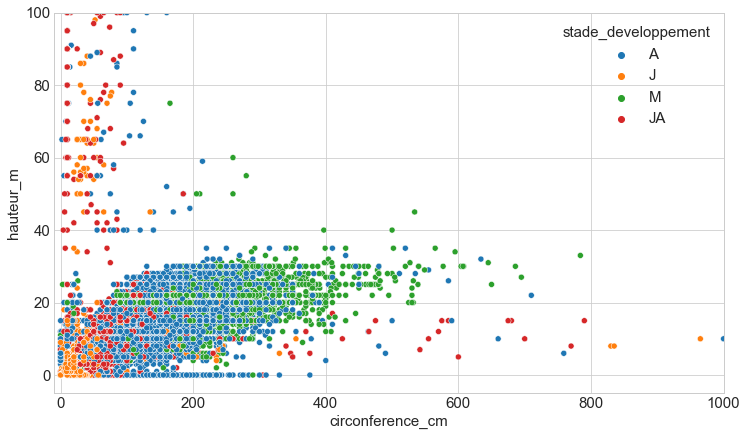

In [44]:
plt.figure(figsize=dims_fig)
ax = sns.scatterplot(data=data,x="circonference_cm",y="hauteur_m",hue="stade_developpement")
ax.set(xlim=(-10,1000))
ax.set(ylim=(-5,100))
plt.show()

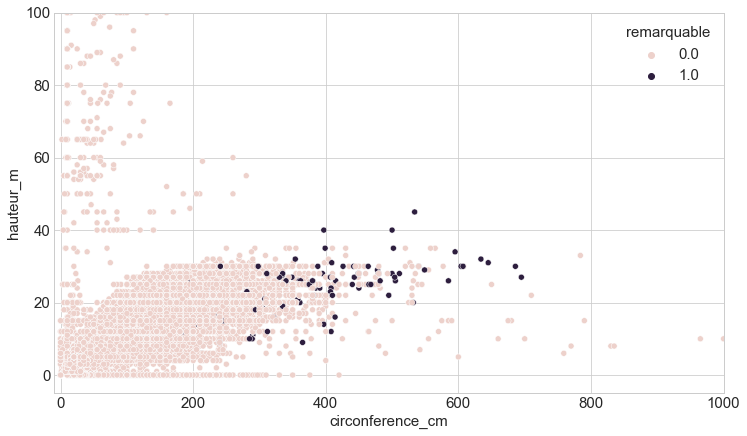

In [45]:
plt.figure(figsize=dims_fig)
ax = sns.scatterplot(data=data,x="circonference_cm",y="hauteur_m",hue="remarquable")
ax.set(xlim=(-10,1000))
ax.set(ylim=(-5,100))
plt.show()

En mettant en relation avec la **colonne stade_developpement** on voir que pour les **valeurs qui semblent défaillantes**, on se retrouve avec **des arbre très grand mais une circonférence faible indiqué comme "Jeune Arbre ou Jeune Arbre Adulte"** ce qui semble incorrect.<br><br>
Pour les arbre **remarquable**, on voir que la **corrélation est forte** et on peut même penser que les arbre "Remarquable" on **des dimension globalement plus importante que les arbres classique !**

### Remarquable / Stade developpement
D'après l'analyse precedente on peut se demander si le fait que les arbres son indiquer comme remarquable ne vienne pas du fait que sont stade de developpement est plus elevé...

<AxesSubplot:>

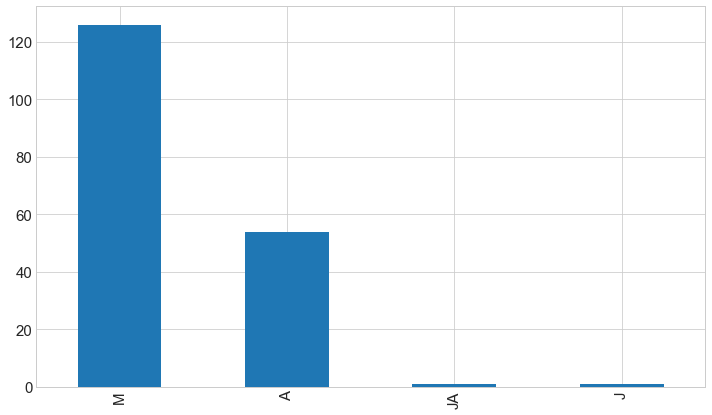

In [46]:
data[data.remarquable==1.].stade_developpement.value_counts().plot.bar(figsize=dims_fig)

On peut voir que la casi totalité des arbre "Remarquable" sont effectivement des arbres "Adulte" ou "Mature"

Une autre corrélation cette fois, avec des valeurs qualitatives, pour le genre des arbres et l'arrondissement.<br>
Cette analyse permet de connaître la répartition des genre d'arbre par arrondissement, pour analyser par exemple les arbres alergènne.

In [47]:
X = "arrondissement"
Y = "genre"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
alergene_tree = ["Salix","Alnus","Betula","Carpinus","Fagus"] # un exemple de 5 genre d'abre provoquant des alergie
cont[[col for col in alergene_tree]].fillna(0)

genre,Salix,Alnus,Betula,Carpinus,Fagus
arrondissement,,,,,
BOIS DE BOULOGNE,0.0,0.0,0.0,25.0,0.0
BOIS DE VINCENNES,44.0,17.0,165.0,229.0,287.0
HAUTS-DE-SEINE,0.0,221.0,119.0,0.0,0.0
PARIS 10E ARRDT,0.0,1.0,74.0,189.0,2.0
PARIS 11E ARRDT,1.0,23.0,58.0,59.0,1.0
PARIS 12E ARRDT,66.0,24.0,172.0,203.0,51.0
PARIS 13E ARRDT,34.0,54.0,260.0,408.0,40.0
PARIS 14E ARRDT,3.0,18.0,115.0,96.0,57.0
PARIS 15E ARRDT,77.0,49.0,368.0,294.0,861.0


Text(0, 0.5, "Nombre d'arbre")

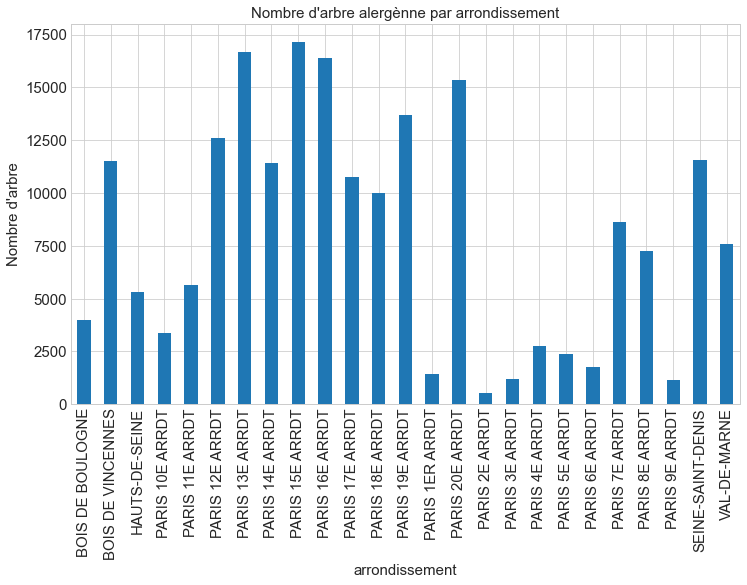

In [48]:
cont.sum(axis=1).plot.bar(figsize=dims_fig)
plt.title("Nombre d'arbre alergènne par arrondissement")
plt.xlabel("arrondissement")
plt.ylabel("Nombre d'arbre")

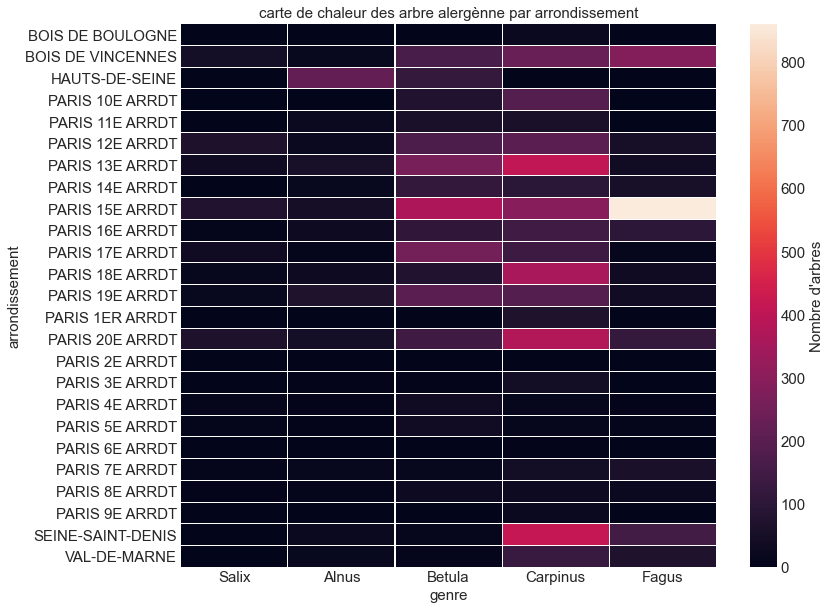

In [49]:
plt.figure(figsize=(12,10))
ax= sns.heatmap(cont[[col for col in alergene_tree]].fillna(0),linewidths=.1)
ax.set_title('carte de chaleur des arbre alergènne par arrondissement')
ax.collections[0].colorbar.set_label("Nombre d'arbres")
plt.show()

Ces informations sont **importantes pour les personnes alergique**. Il peut être interresant de **prendre ce facteur en compte pour l'entretien des arbres** de Paris.

### Latitude / Longitude

Cette corrélation semblent evidente mais elle peut nous indiquer la concentration/emplacement des arbres géographiquement.

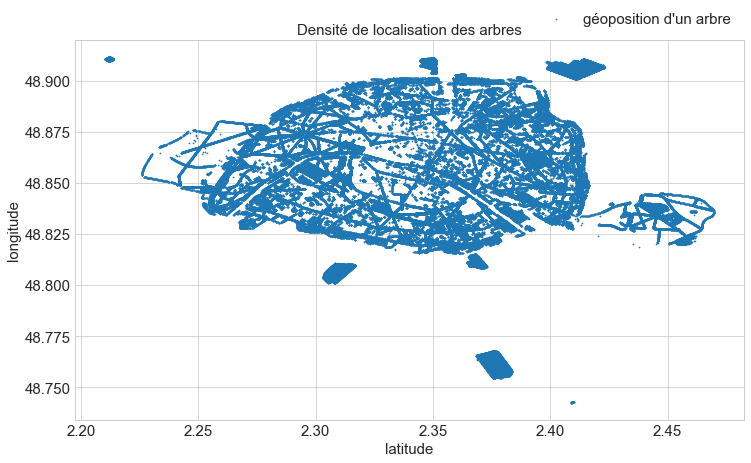

In [50]:
data.plot.scatter(x="geo_point_2d_b",y="geo_point_2d_a",figsize=dims_fig,s=0.5,label="géoposition d'un arbre")

plt.title("Densité de localisation des arbres")
plt.ylabel("longitude")
plt.xlabel("latitude")

plt.legend(loc="lower right",bbox_to_anchor=(1, 1))

Sans carte il est difficile de se faire une idées précise, on peut cependant voir que globalement les arbres sont très condenser.

<AxesSubplot:xlabel='stade_developpement', ylabel='arrondissement'>

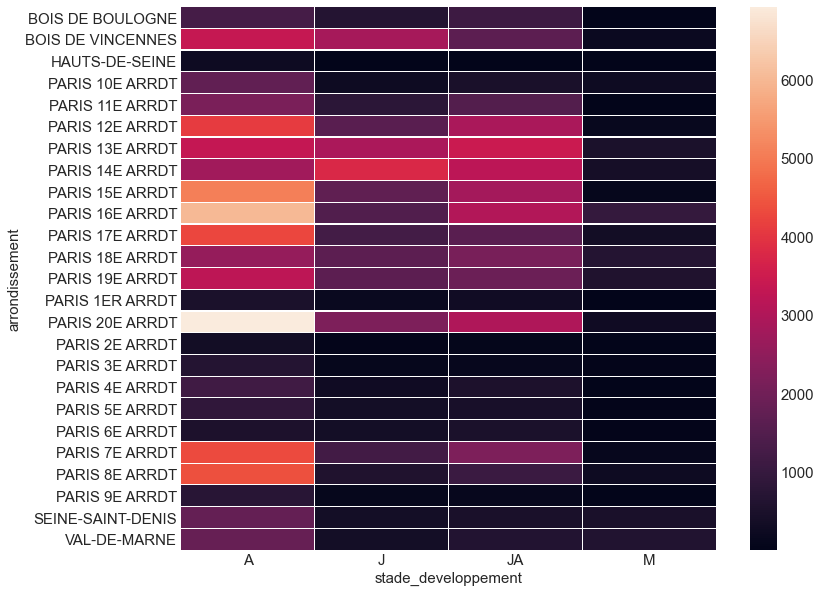

In [51]:
plt.figure(figsize=(12,10))

data_arr_by_stade =data[["arrondissement",
                         "stade_developpement"]].pivot_table(index="arrondissement",
                                                             columns="stade_developpement",aggfunc=len)


sns.heatmap(data_arr_by_stade,linewidths=.1)

Grâce à cette carte de chaleur, nous avons une idée plus précise de la densité des arbres répartient par arrondissement et par stade de developpement

# Nettoyage du jeu de données

Dans cette partie nous allons nettoyer notre jeu de données grâce à l'analyse faite précédamment. <br> Pour ce faire il est normalement conseiller de faire des aller-retour entre l'analyse et le nettoyage, dans notre contexte nous avons d'abord fait une analyse, la plus approfondi possible puis un nettoyage du jeu de données.<br><br>

On vas commencer par retirer la colonne numéro et type_emplacement qui n'ont aucune valeur, ensuite on vas retirer les valeurs aberrantes, puis retirer certaine ligne N/A puis les duplication.

In [52]:
print("Petit rappel de la forme du jeu de donnée avant nettoyage : ")
print("Dimensionnalité du DataFrame: ", data.shape)
data.head()

Petit rappel de la forme du jeu de donnée avant nettoyage : 
Dimensionnalité du DataFrame:  (200137, 18)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [53]:
#On retire la colonne numero et type_emplacement qui n'ont aucune valeur
data_clean = data.drop(columns="numero")
data_clean = data_clean.drop(columns="type_emplacement")

print("Dimensionnalité du DataFrame: ", data_clean.shape)

Dimensionnalité du DataFrame:  (200137, 16)


In [54]:
# on met la valeur remarquable en boolean
data_clean["remarquable"] = data_clean["remarquable"].astype(bool)

On a retiré les colonnes inutiles et mis au bon format la colonne remarquable, on vas maintenant retirer les lignes avec une valeur vide sur les colonnes essentielles a notre analyse. 

In [55]:
# On peut également retirer les valeurs NA pour les colonne genre et circonference et hauteur
data_clean = data_clean[data_clean.genre.notna()]
data_clean = data_clean[data_clean.circonference_cm.notna()]
data_clean = data_clean[data_clean.hauteur_m.notna()]
# on peut retirer également la ligne d'oublie sur la domanialite
data_clean = data_clean[data_clean.domanialite.notna()]

print("Dimensionnalité du DataFrame: ", data_clean.shape)

Dimensionnalité du DataFrame:  (200120, 16)


In [56]:
# on retire mainteannt les valeurs aberrantes sur la circonference et la hauteur
data_clean = data_clean[data_clean.hauteur_m <= 35]
data_clean = data_clean[data_clean.circonference_cm <= 600]
data_clean = data_clean[data_clean.hauteur_m != 0]
data_clean = data_clean[data_clean.circonference_cm != 0]
print("Dimensionnalité du DataFrame: ", data_clean.shape)

Dimensionnalité du DataFrame:  (159958, 16)


On voir après avoir retiré les valeur considérer comme aberrante et les valeur vide qu'il ne reste que **160 000 valeurs**.
> J'ai pris le choix de ne pas verifier les outliers au dessus des 35m de hauteur et 600cm circonférence. Il est possible d'afiner bien plus et d'avoir un jeu de données plus consequent avec des valeurs plus atypiques qu'actuellement.

Après ce nettoyage on vas analyser les dupliquation de valeur géographique.

In [57]:
# on retire les valeurs dupliqué des geo_point ( le mieux serais de faire le trie selon l'analyse faite dans la première partie)
# on pourrait par exemple mixer les valeur manquante (et faire la moyenne des valeurs existante)
same_geo = data_clean[data_clean.duplicated(['geo_point_2d_a','geo_point_2d_b'],keep=False)]
same_geo


,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
12794,115338,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,1,Peuplier,Populus,nigra,NaN,120,20,NaN,True,48.900332,2.386441
12795,115339,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,2,Peuplier,Populus,nigra,NaN,100,20,NaN,True,48.900290,2.386442
12796,115340,Jardin,PARIS 19E ARRDT,NaN,VOIE DF19,3,Peuplier,Populus,nigra,NaN,165,20,NaN,True,48.900253,2.386444
76385,195525,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19001,Peuplier,Populus,nigra,Italica',120,20,NaN,True,48.900332,2.386441
76386,195526,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19002,Peuplier,Populus,nigra,Italica',100,20,NaN,True,48.900290,2.386442
76387,195527,PERIPHERIQUE,PARIS 19E ARRDT,NaN,VOIE DF/19,09VO19003,Peuplier,Populus,nigra,Italica',165,20,NaN,True,48.900253,2.386444
188269,2010572,Jardin,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20012,Platane,Platanus,x hispanica,NaN,195,18,A,False,48.839118,2.438810
188304,2010609,Jardin,BOIS DE VINCENNES,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20023,Platane,Platanus,x hispanica,NaN,190,24,A,False,48.839118,2.438810


On voir ici que les 6 première valeur sont dans le cas d'une mise à jour de domanialite, on peut donc considérer la valeur la plus récente (ID) comme étant la bonne. pour les 2 dernières valeurs il n'es pas nécessaire de modifier ses valeurs.

In [58]:
same_geo = same_geo[same_geo.stade_developpement.isna()]
same_geo = same_geo[same_geo.domanialite == "Jardin"]
data_clean = data_clean.drop(index=same_geo.index)
data_clean.head()

,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,False,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,True,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,True,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,True,48.857722,2.321006
7,99881,Jardin,PARIS 16E ARRDT,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,NaN,True,48.876722,2.280222


Le jeu de données et plus propre pour des analyses basées sur la dimensionnalité de l'arbre, son genre ou encore sont emplacement (par géoposition).<br>
On peut encore ajuster les données en supprimer les valeur vide sur la colonne remarquable si le besoin de l'analyse se porte sur cette colonne par exemple. <br><br>
Le nettoyage du jeu de données se base principalement sur le besoin, dans notre contexte, **lors de l'entretien il est important de savoir : le genre de l'arbre, sont emplacement, sa domanialite et sa dimensionalité et son stade de developpement(optionnel mais interessant)**.

# Synthèse analyse de données

L'analyse de données est une part importante dans tout processus liée a la "Data", cette tache est chronophage mais importantes.<br>
Ici nous avons réaliser une analyse exploratoire qui permet d'avoir une vision global des données, on peux pousser bien plus loin cette analyse, en regardant les corrélation par espece d'arbre, par arrondissement, etc.<br>
Bien que partiel, cette analyse nous donne énormement d'information sur le jeu de données, on peut par exemple trouver les emplacement géographique des arbres comme dans l'exemple ci-dessous, ainsi que de multiple information sur ces caractéristique.<br><br>
On pourrais poussé l'analyse bien plus en profondeur en mettant en corélation plusieur autre valeurs que celle déjà effectuées et même ajouter une autre dimension avec de l'IA en faisant des projections plus poussé.

In [59]:
map = folium.Map(location=[48.850, 2.390], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map)

MAX_DATA = 1000

def format_data(row):
    output = ""
    output = output + "- lieu : " + str(row['lieu'])
    output = output + " - type : " + str(row['libelle_francais'])
    output = output + " - genre : " + str(row['genre'])
    output = output + " - espece : " + str(row['espece'])
    output = output + " - variete : " + str(row['variete'])
    output = output + " - circonference cm : " + str(row['circonference_cm'])
    output = output + " - hauteur mètre : " + str(row['hauteur_m'])
    output = output + " - stade_developpement : " + str(row['stade_developpement'])
    return output

for i in range(0,MAX_DATA):
    folium.Marker(
        location=[data_clean.iloc[i]["geo_point_2d_a"],data_clean.iloc[i]["geo_point_2d_b"]],
        popup=format_data(data_clean.iloc[i])
        ).add_to(marker_cluster)
    
map

In [60]:
map = folium.Map(location=[48.850, 2.390], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map)


def format_data(row):
    output = ""
    output = output + "- lieu : " + str(row['lieu'])
    output = output + " - type : " + str(row['libelle_francais'])
    output = output + " - genre : " + str(row['genre'])
    output = output + " - espece : " + str(row['espece'])
    output = output + " - variete : " + str(row['variete'])
    output = output + " - circonference cm : " + str(row['circonference_cm'])
    output = output + " - hauteur mètre : " + str(row['hauteur_m'])
    output = output + " - stade_developpement : " + str(row['stade_developpement'])
    return output


# décommenter pour créer le document :

#for i in range(0,len(data_clean)):
#    folium.Marker(
#        location=[data_clean.iloc[i]["geo_point_2d_a"],data_clean.iloc[i]["geo_point_2d_b"]],
#        popup=format_data(data_clean.iloc[i])
#        ).add_to(marker_cluster)
#    
#map.save("clean_data_map.html")